In [1]:

import delay.calculator as calc
from delay.delay import *
from delay.strategy import fA_Hard, fB_Hard, showNormalFunctions

In [5]:
def modelFunctions(N, d = 20):    
    def fA(x):
        return N/2 if 0 <= x <= N/2 else N-x

    def fB(x):
        return x if 0 <= x <= N/2 else N/2
    
    return (fA, fB)

def simulate():
    def nextElem(func):
        term = 0 if func == max else N
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r <= prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

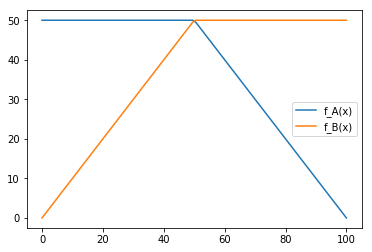

In [6]:
showNormalFunctions(fA_Hard, fB_Hard, 100)

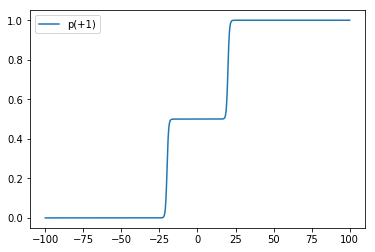

In [11]:
calculateProbability = calc.smooth(d = 20)

N = 100
x = np.linspace(-N, N, num=1000)

y = []
for xx in x:
    y.append(calculateProbability(xx))

plt.plot(x, y, label='p(+1)')

plt.legend()
plt.show()

µ =  49.97372714823212


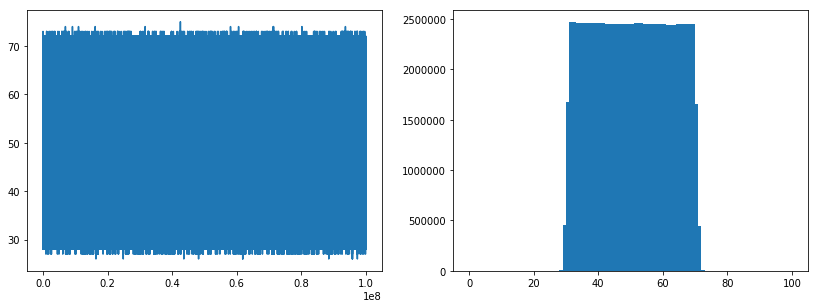

In [22]:
N = 100
tauA = 0
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 1000000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(0, N, N+1))
print('µ = ', np.mean(x[100*conv:]))

µ =  47.209399695995664


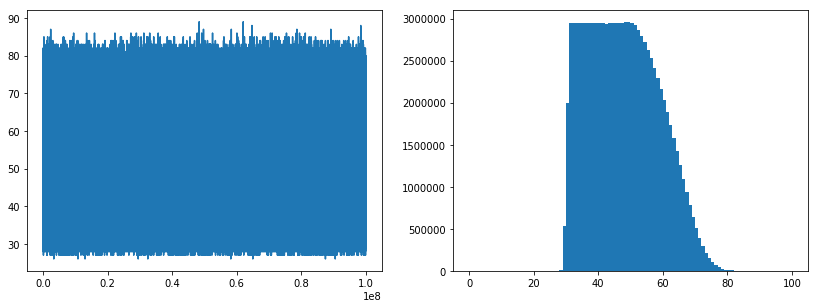

In [23]:
N = 100
tauA = 20
tauB = 0
x = [N/2] * 20 + [N/2 + 1] 
duration = 1000000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(0, N, N+1));
print('µ = ', np.mean(x[100*conv:]))

µ =  52.83147612300231


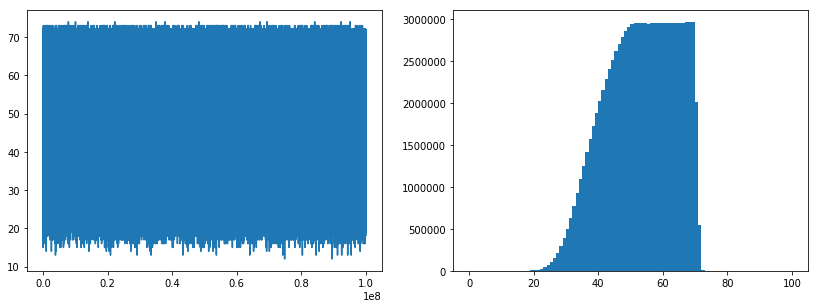

In [24]:
N = 100
tauA = 0
tauB = 20
x = [N/2] * 20 + [N/2 + 1] 
duration = 1000000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(0, N, N+1))
print('µ = ', np.mean(x[100*conv:]))

In [10]:
N = 500
tauA = 0
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 100000 * N
conv = N
d = 50
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(1, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.smooth(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 50
for i in range(1, 11):
    x = x[:101]
    d = i * 10
    calculateProbability = calc.smooth(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
50 ,  10 ,  247.91075459487058
50 ,  20 ,  246.9039467808083
50 ,  30 ,  245.13225214499568
50 ,  40 ,  243.4999095797624
50 ,  50 ,  241.8537206761604
50 ,  60 ,  240.669842068988
50 ,  70 ,  239.66577659172302
50 ,  80 ,  238.36179776693544
50 ,  90 ,  237.88700413238405
50 ,  100 ,  237.4438480714984
10 ,  50 ,  241.9181550203472
20 ,  50 ,  241.62925025917366
30 ,  50 ,  241.6624495514033
40 ,  50 ,  241.9906030019839
50 ,  50 ,  242.0280154989076
60 ,  50 ,  241.97006386433532
70 ,  50 ,  241.95216384046952
80 ,  50 ,  242.04040826664195
90 ,  50 ,  241.89002334549835
100 ,  50 ,  242.0947109796635


In [13]:
N = 500
tauA = 50
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 100000 * N
conv = N
d = 50
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
tauA = 0
calculateProbability = calc.smooth(d=d, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 50
x = x[:101]
d = 0
calculateProbability = calc.smooth(d=d, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
50 ,  0 ,  250.16851143103796
0 ,  50 ,  250.06791703984743


In [15]:
N = 500
tauA = 0
tauB = 50
x = [N/2] * 100 + [N/2 + 1] 
duration = 100000 * N
conv = N
d = 50
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
tauA = 0
calculateProbability = calc.smooth(d=d, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 50
x = x[:101]
d = 0
calculateProbability = calc.smooth(d=d, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
50 ,  0 ,  257.564715935209
0 ,  50 ,  249.99930124265416


In [11]:
N = 500
tauA = 0
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 100000 * N
conv = N
d = 150
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(1, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.smooth(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 150
for i in range(1, 11):
    x = x[:101]
    d = i * 10
    calculateProbability = calc.smooth(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
150 ,  10 ,  243.8844780113658
150 ,  20 ,  247.1836956445794
150 ,  30 ,  243.41985768957704
150 ,  40 ,  244.96372111439774
150 ,  50 ,  242.87265891614513
150 ,  60 ,  238.90826436967563
150 ,  70 ,  237.61465749588774
150 ,  80 ,  234.51825014327798
150 ,  90 ,  232.8334585549687
150 ,  100 ,  234.76741768750378
10 ,  150 ,  223.19153446756795
20 ,  150 ,  224.57579240930863
30 ,  150 ,  222.52726722214234
40 ,  150 ,  225.1422078806207
50 ,  150 ,  225.73337661519443
60 ,  150 ,  224.75380253985873
70 ,  150 ,  225.47805348781978
80 ,  150 ,  223.61739190477311
90 ,  150 ,  225.23462022629343
100 ,  150 ,  225.8190051908003


In [10]:
N = 500
tauA = 0
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 100000 * N
conv = N
d = 150
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
x = x[:101]
tauA = 0
calculateProbability = calc.smooth(N, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 150
x = x[:101]
d = 0
calculateProbability = calc.smooth(N, w = 0.99)
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
150 ,  0 ,  250.35024868117884
0 ,  150 ,  223.12620482989615


In [8]:
N = 500
tauA = 0
tauB = 0
x = [N/2] * 100 + [N/2 + 1] 
duration = 100000000
conv = N
d = 150


print('d, τ, µ')

tauA = 50
for i in range(11, 101):
    x = x[:101]
    d = i * 10
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.smooth(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
110 ,  50 ,  241.7842980568874
120 ,  50 ,  242.00683910264382
130 ,  50 ,  240.11364601822663
140 ,  50 ,  240.42311870200112
150 ,  50 ,  241.8460604356968
160 ,  50 ,  240.7659925926438
170 ,  50 ,  236.98400982106062
180 ,  50 ,  240.99653477088532
190 ,  50 ,  242.18292552800924
200 ,  50 ,  241.527127371287
210 ,  50 ,  240.35448541467707
220 ,  50 ,  240.76247679829757
230 ,  50 ,  236.19745079597269
240 ,  50 ,  238.253288278318
250 ,  50 ,  245.28738098023533
260 ,  50 ,  252.7545533745884
270 ,  50 ,  248.934745988901
280 ,  50 ,  248.67739858512
290 ,  50 ,  249.60545567632792
300 ,  50 ,  248.1533107305214
310 ,  50 ,  241.72977031809103
320 ,  50 ,  244.72912678697543
330 ,  50 ,  246.06534387594067
340 ,  50 ,  249.60785798505597
350 ,  50 ,  249.7884430752101
360 ,  50 ,  249.9799509657324
370 ,  50 ,  250.1318231984578
380 ,  50 ,  260.6633010906112
390 ,  50 ,  255.73384663213096
400 ,  50 ,  248.4545833225321
410 ,  50 ,  245.88568383737802
420 ,  50 ,  253.37

In [13]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 150
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:101]
    N = i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [N/2] * 150 + [N/2 + 1]
    calculateProbability = calc.smooth(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
150 ,  150 ,  50 ,  25.12498429703415 ,  -0.1249842970341497
150 ,  150 ,  100 ,  49.68906085603711 ,  0.3109391439628908
150 ,  150 ,  150 ,  76.52689393783938 ,  -1.5268939378393753
150 ,  150 ,  200 ,  98.06628718624974 ,  1.9337128137502617
150 ,  150 ,  250 ,  124.01077150885908 ,  0.9892284911409206
150 ,  150 ,  300 ,  146.48021216095734 ,  3.519787839042664
150 ,  150 ,  350 ,  146.58486643495178 ,  28.415133565048222
150 ,  150 ,  400 ,  174.08050689123718 ,  25.919493108762822
150 ,  150 ,  450 ,  200.6613082224683 ,  24.338691777531693
150 ,  150 ,  500 ,  228.62659553394138 ,  21.373404466058616


In [14]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 150
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:151]
    N = 500 + i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [N/2] * 150 + [N/2 + 1]
    calculateProbability = calc.smooth(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
150 ,  150 ,  550 ,  248.46180793463483 ,  26.538192065365166
150 ,  150 ,  600 ,  269.53540341882723 ,  30.46459658117277
150 ,  150 ,  650 ,  305.6874376573487 ,  19.31256234265129
150 ,  150 ,  700 ,  330.4373273236811 ,  19.562672676318925
150 ,  150 ,  750 ,  351.8463557758036 ,  23.1536442241964
150 ,  150 ,  800 ,  379.1844537685166 ,  20.81554623148338
150 ,  150 ,  850 ,  395.32099634930444 ,  29.679003650695563
150 ,  150 ,  900 ,  423.635847145854 ,  26.364152854146027
150 ,  150 ,  950 ,  442.4125111822634 ,  32.587488817736585
150 ,  150 ,  1000 ,  473.66925044476307 ,  26.330749555236935


In [18]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 150
tauA = 150

print('d, τ, N, µ, r')
for i in range(0, 35):
    x = x[:151]
    N = 290 + i*2
    (fA, fB) = modelFunctions(N, d = d)
    x = [N/2] * 150 + [N/2 + 1]
    calculateProbability = calc.smooth(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
150 ,  150 ,  290 ,  147.90171539949696 ,  -2.9017153994969647
150 ,  150 ,  292 ,  147.51211247958113 ,  -1.512112479581134
150 ,  150 ,  294 ,  147.83061377150355 ,  -0.8306137715035504
150 ,  150 ,  296 ,  146.34441811740382 ,  1.6555818825961808
150 ,  150 ,  298 ,  145.43961027215704 ,  3.56038972784296
150 ,  150 ,  300 ,  152.99812745573115 ,  -2.998127455731151
150 ,  150 ,  302 ,  139.8003802945521 ,  11.199619705447901
150 ,  150 ,  304 ,  145.21454050093936 ,  6.785459499060636
150 ,  150 ,  306 ,  133.37253220697065 ,  19.627467793029354
150 ,  150 ,  308 ,  133.91708093301094 ,  20.082919066989064
150 ,  150 ,  310 ,  135.6637879647665 ,  19.3362120352335
150 ,  150 ,  312 ,  134.141197865778 ,  21.858802134222003
150 ,  150 ,  314 ,  133.67460281631378 ,  23.32539718368622
150 ,  150 ,  316 ,  133.02904720859576 ,  24.970952791404244
150 ,  150 ,  318 ,  136.94317403210422 ,  22.056825967895776
150 ,  150 ,  320 ,  136.83779254187448 ,  23.162207458125522
15